# 🌞 Solar Radiation Prediction — Machine Learning Project  
### Created by **Ashesh Bhattarai**  
© 2025 Ashesh Bhattarai — All rights reserved.
# Solar Radiation Prediction( Machine learning)
## using linear regression+ Random Forest model
## Dataset:Solar Prediction(Kaggle)


## Table of Contents
1. Importing Libraries  
2. Loading the Dataset  
3. Cleaning the Data  
4. Feature Engineering  
5. Exploratory Data Analysis (EDA)  
6. Preparing Inputs and Output  
7. Linear Regression Model  
8. Random Forest Model  
9. Comparing Model Performance  
10. Feature Importance  
11. Final Thoughts

In [64]:
# at first we are importing the tools that help us read, make charts and train our machine learning models. 

import pandas as pd # this helps to read and work with the data of the tables. 
import matplotlib.pyplot as plt #this helps to draw the graphs and pictures.

from sklearn.model_selection import train_test_split # this helps to split the data into 'learning' and testing parts
from sklearn.linear_model import LinearRegression #this cerates a simple prediction model (a straight- line learner)
from sklearn.metrics import r2_score, mean_absolute_error #this helps  to tell us the result how good actually our model's are.

# Loading the dataset into variable df which holds our data  
df = pd.read_csv("SolarPrediction.csv")

df.head(10) # looking at the data how it actually look the first 10 datas. if only df.head() then by default it shows top 5 data.




,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [9]:
df.info() #give us the info about the data about how it looks ke: num and name of columns, data type, and if any things are missing. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [10]:
df. describe() 
# this simple gives us the math summaries of each column like 

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [15]:
#now we gonna clean th dtaa and creeate the time features
#at first we remove any empty or repeated rows.
df=df.dropna()
df=df.drop_duplicates()

# the data column is a date and tiume written as text according to info from df.info()
# we turn it into real datetime so the computer understands it better and extract the hour month and day
df["Data"]= pd.to_datetime(df["Data"])

# now we extract the hour of the day, month and day.
df["Hour"]=df["Data"].dt.hour
df["Month"]=df["Data"].dt.month
df["Day"]=df["Data"].dt.day

# thsi shows new time columns so that we can see each of them separately
df[["Data","Hour","Month","Day"]].head()
    


,Data,Hour,Month,Day
0,2016-09-29,0,9,29
1,2016-09-29,0,9,29
2,2016-09-29,0,9,29
3,2016-09-29,0,9,29
4,2016-09-29,0,9,29


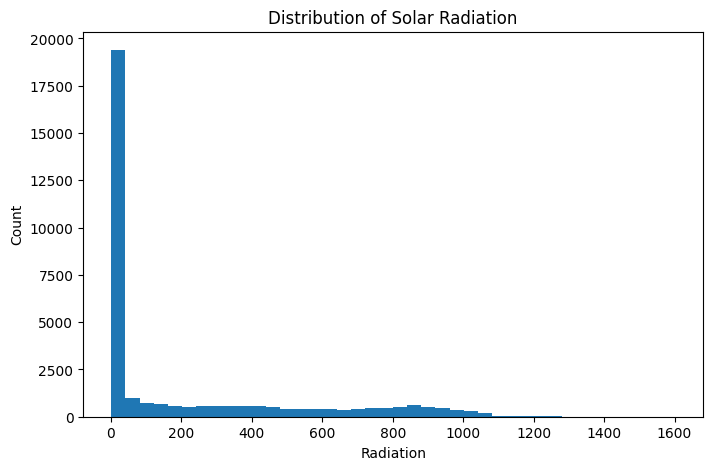

In [18]:
# make a empty picture where we will draw our graph 

plt.figure(figsize=(8,5)) # size of fig is bit wide and not too tall.(width=8 and height=5
plt.hist(df["Radiation"],bins=40) # creating a histogram of the numbers in the raditaion column. bins=40 means we cut douwnb the data into 40 little buckets. 
plt.xlabel("Radiation") #put a name under the botto m line in x-axis
plt.ylabel("Count") # put a name on the side i.e y-axis
plt.title("Distribution of Solar Radiation") #title of the histogram
plt.show() #show the picture on the screen. 



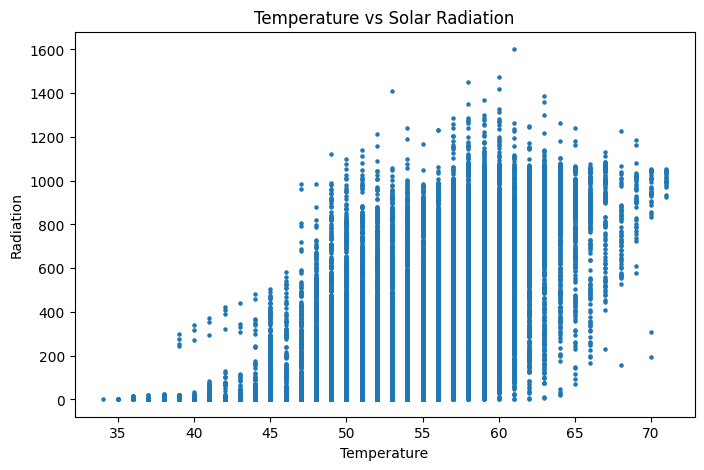

In [21]:
# this we aere exploring how temperature and the radiation are related to each other. both are quantitative so using the scattterplot
plt.figure(figsize=(8,5))
# now drawing the scatterplot
#each dot shows one moment in the time
plt.scatter(df["Temperature"],df["Radiation"],s=5) #left/right=temperature and up/down=radiation. s means the size of the dots.
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.title("Temperature vs Solar Radiation")
plt.show()

In [26]:
#x=the things our model will look at to make the guesses for radiation. we can also think it as a clues or hints for our model in order to predict the y which is Radiation
X=df[["Temperature", "Humidity", "Pressure", "Hour"]]

# y is the Answer we want the model to Learn to guess. 
# web want our model to see the clues of x and guess the radiation.
Y=df["Radiation"]

# now we are splitting the data into the two pieces
# first 
# training data= our model gets trained by analyzing the pattern it has 
# second
# Test data= this is the data type of quiz for our model . 
# we also hide this part until the end to see if our model really learned. 
# test_size=0.2 means that our model takes 80% of our dat to learn and the remaing 20& (0.2) is used to test our model how much it learned. 
# random _satet=42 means that we are splitting the same every time. 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# thsi shows how big the traininga nd testing sets are
X_train.shape,X_test.shape


((26148, 4), (6538, 4))

In [29]:
#now we also need linear rigression model  which hel[ps us to fi d the straight line that best fits our data.
model=LinearRegression()

# the model we made studeis the training data.
model.fit(X_train,Y_train)

#coefficiennt is the value of how mucn each input ( temp, humidity, pressure, hour we passed to x)  pushes the Radiation(y) up or down
# intercept=the starting point opf the line when everything else is zero.
print("the Coefficient of our model:", model.coef_)
print("the intercept of our model;",model.intercept_)

the Coefficient of our model: [ 3.89297120e+01 -4.80358760e-01 -7.54867689e+02  0.00000000e+00]
the intercept of our model; 21219.791719174824


In [37]:
# now our model will try to guess the radiation foer new data which it has never seen as it has been trained by our data previously.
Y_prediction=model.predict(X_test)


#R^2 score tell us how smart our model is or it tell how well the model did on the testing.
# if R^2 score is close to 1 then we can be sure that our model really understood the patterns very well. 
#if R^2 is close to ) it tell us that our model did not do well on the training.
print ("the R^2 score of our model is:", r2_score(Y_test, Y_prediction))

#mean absolute error tell us how much model's guesses are wrong on average.
#the measuresb the distance between real radiation and the guessed one. 
#smaller the mean absolute error better the model and closer the guesses.

print ("the mean absolute error of our model is: ", mean_absolute_error(Y_test,Y_prediction))



the R^2 score of our model is: 0.5465914485874641
the mean absolute error of our model is:  161.39042811024723


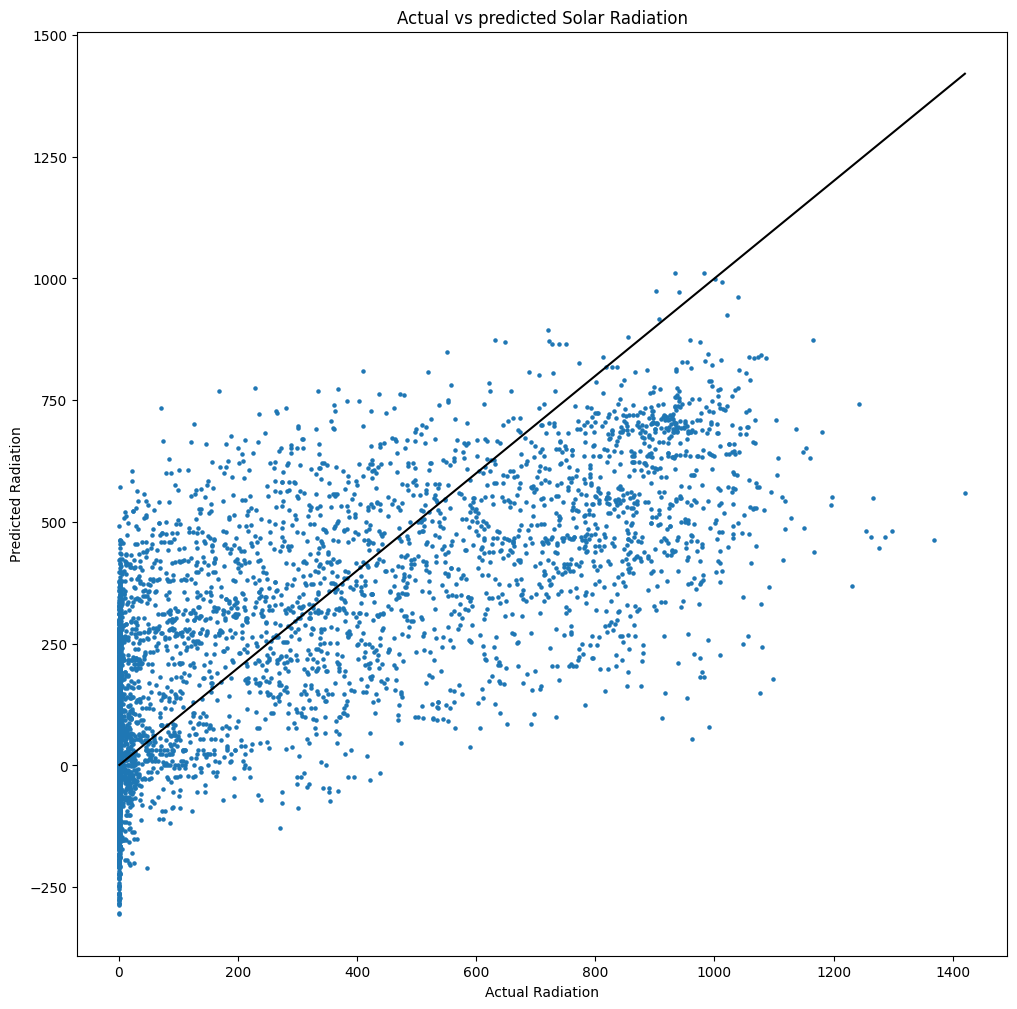

In [46]:

#this scatterplot shows how good the model's gueses are.
#each dot compares the real radiation with the prdicted radiation. 
#the the dots are close to the line, the model gues is correct. 
plt.figure(figsize=(12,12))
# drawing the scatterplot to show the real and predicted radiation
plt.scatter(Y_test, Y_prediction, s=5)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs predicted Solar Radiation") #title of the scatterplot
plt.plot([Y_test.min(), Y_test.max()],   # start and end of the x-axis
    [Y_test.min(), Y_test.max()],   # same values for the y-axis
    color='black')
plt.show() # show the final scatterplot in the screen
          

In [56]:
#the accuracy is not so good .i want to increase it even better one. 
#so using the RandomForestRegressor which is the smarter model.

from sklearn.ensemble import RandomForestRegressor
# 🍼 This model uses many tiny trees to make better predictions.
# 🍼 More trees = smarter forest.

# 🍼 rf_model is our new smarter model.
rf_model = RandomForestRegressor(
    n_estimators=200,  # 🍼 We grow 200 baby trees. Each tree learns a different pattern.
    random_state=42    # 🍼 This keeps the forest the same every time we run it.
)

# 🍼 Now we teach the forest using our training data.
rf_model.fit(X_train, Y_train)

# 🍼 The forest now tries to guess radiation for the test data.
rf_prediction = rf_model.predict(X_test)

# 🍼 Let's see how good our random forest is.
print("the R^2 score for our random forest model is:", r2_score(Y_test, rf_prediction))
# 🍼 Higher R² = better learning.

print("mean absolute error for Random Forest model is:", mean_absolute_error(Y_test, rf_prediction))
# 🍼 Lower MAE = fewer mistakes on average.


the R^2 score for our random forest model is: 0.6693598463917998
mean absolute error for Random Forest model is: 95.67776613204589


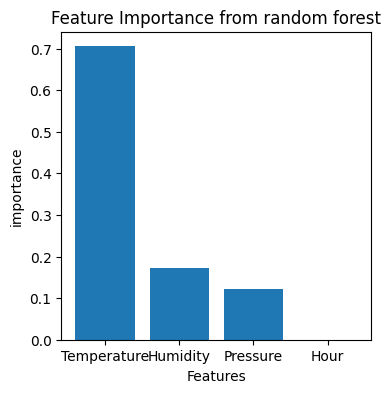

In [63]:
import numpy as np 
# this helps us to do math works 

importance=rf_model.feature_importances_
#the forest tells us how important each feature is.
#bigger the number bigger the importance which mean this feature helps the model more. 
feature_name= X.columns #these are the features we used ie temp, humidity, pressure, and hour.

plt.figure(figsize=(4,4))
plt.bar(feature_name, importance)
plt.xlabel("Features")
plt.ylabel("importance")
plt.title("Feature Importance from random forest")
plt.show()



## Conclusion
## What I learned:
1. How to clean and prepare the real-world dataset
2. How to build Linear Regression and Random Forest models
3. How to evaluate model performance using R² and Mean absolute error
4. How to visualize predictions and feature importance

### ➤ Next Steps (Future Work):
1. Try more models 
2. Deploy model as an API or Streamlit app
